In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
data=pd.read_csv(r"C:\Users\aryan\Downloads\Customer_data - customer_data.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.drop("customerID",axis=1,inplace=True)

In [5]:
data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [6]:
data["TotalCharges"].isnull().sum()

11

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
data[data['TotalCharges'].isnull()][['tenure', 'MonthlyCharges']]

,tenure,MonthlyCharges
488,0,52.55
753,0,20.25
936,0,80.85
1082,0,25.75
1340,0,56.05
3331,0,19.85
3826,0,25.35
4380,0,20.00
5218,0,19.70
6670,0,73.35


In [9]:
data["TotalCharges"].fillna(0,inplace=True)

In [10]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
#Churn Distributiom

<Axes: xlabel='Churn', ylabel='count'>

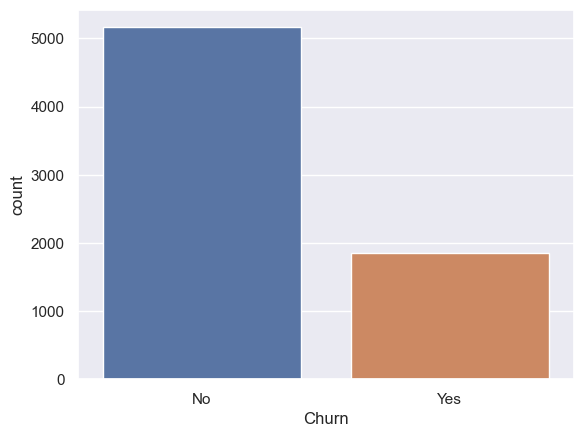

In [14]:
sns.countplot(x='Churn', data=data)

In [15]:
#Churn by Contract Type

<Axes: xlabel='Contract', ylabel='count'>

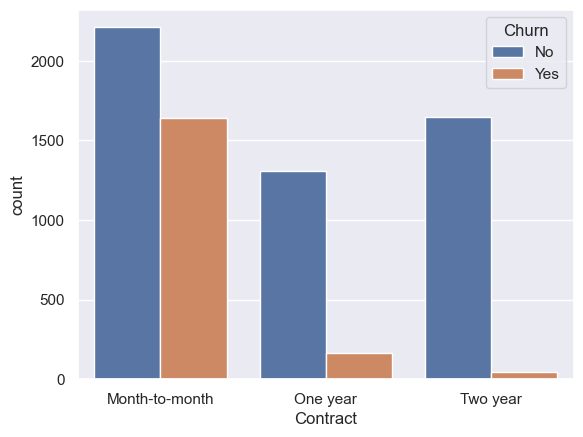

In [16]:
sns.countplot(x='Contract', hue='Churn', data=data)

In [17]:
#Monthly Charges vs. Churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

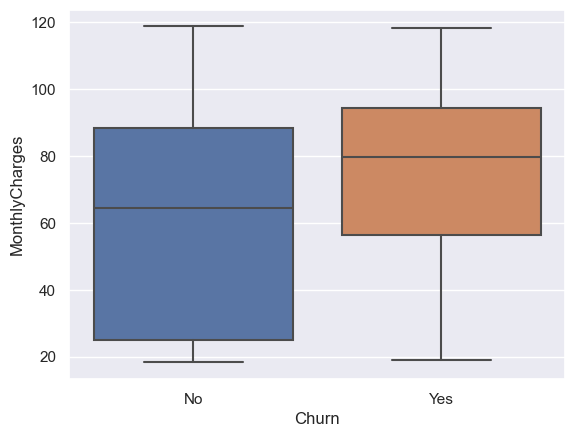

In [18]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)

<Axes: xlabel='tenure', ylabel='Count'>

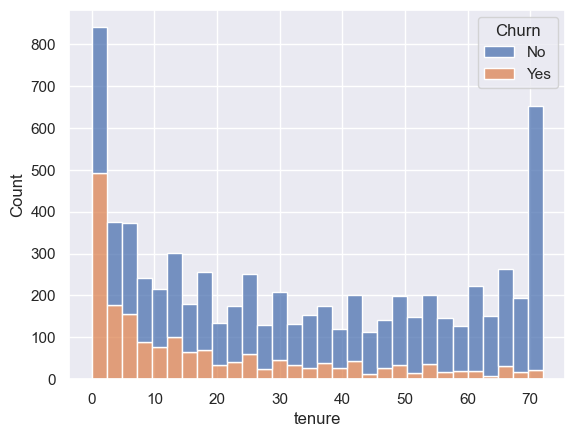

In [19]:
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', bins=30)

In [20]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [21]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    data[col] = enc.fit_transform(data[col])

In [22]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
data = pd.get_dummies(data,columns=['Contract', 'PaymentMethod'], drop_first=True)


In [24]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,0,2,...,0,1,29.85,29.85,0,False,False,False,True,False
1,1,0,0,0,34,1,0,0,2,0,...,0,0,56.95,1889.50,0,True,False,False,False,True
2,1,0,0,0,2,1,0,0,2,2,...,0,1,53.85,108.15,1,False,False,False,False,True
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,0,True,False,False,False,False
4,0,0,0,0,2,1,0,1,0,0,...,0,1,70.70,151.65,1,False,False,False,True,False


In [25]:
data=data.astype(int)

In [26]:
data.drop("TotalCharges",axis=1,inplace=True)

In [27]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,29,0,0,0,0,1,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,56,0,1,0,0,0,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,53,1,0,0,0,0,1
3,1,0,0,0,45,0,1,0,2,0,...,0,0,0,42,0,1,0,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,70,1,0,0,0,1,0


In [28]:
x=data.drop("Churn",axis=1)
y=data["Churn"]

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score

In [30]:
models = [RandomForestClassifier,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    SVC]

In [31]:
for i in models:
    kf=KFold(n_splits=5)
    print(i)
    print(cross_val_score(i(),x,y,cv=kf,scoring='accuracy').mean())

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.7876352262473258
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.7340862406342832
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.7692652411513622
<class 'sklearn.svm._classes.SVC'>
0.7909110725836703


In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
dic={"n_estimators" : [100,200,300],
    "random_state" : [10,20,30,40]
}

In [34]:
random=RandomizedSearchCV(RandomForestClassifier(),param_distributions=dic,cv=kf,n_iter=20,verbose=2)

In [35]:
random.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................n_estimators=100, random_state=10; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=10; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=10; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=10; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=10; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=20; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=20; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=20; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=20; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=20; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=30; total time=   0.6s
[CV] END ..................n_estimators=100, ran

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'n_estimators': [100, 200, 300],
                                        'random_state': [10, 20, 30, 40]},
                   verbose=2)

In [36]:
random.best_params_

{'random_state': 10, 'n_estimators': 300}

In [37]:
model=RandomForestClassifier(random_state=10, n_estimators=300)

In [38]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=10)

In [41]:
model.score(x_train,y_train)

0.9884259259259259

In [79]:
model.score(x_test,y_test)


0.9473309608540925

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [81]:
y_pred=model.predict(x_test)

In [82]:
print(confusion_matrix(y_test,y_pred))

[[1026   27]
 [  47  305]]


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1053
           1       0.92      0.87      0.89       352

    accuracy                           0.95      1405
   macro avg       0.94      0.92      0.93      1405
weighted avg       0.95      0.95      0.95      1405



In [47]:
pd.Series(model.feature_importances_,index=x.columns).nlargest(25)

tenure                                   0.262080
MonthlyCharges                           0.171384
TechSupport                              0.053675
OnlineSecurity                           0.052890
PaymentMethod_Electronic check           0.040107
gender                                   0.038442
OnlineBackup                             0.033372
PaperlessBilling                         0.033319
Partner                                  0.031513
MultipleLines                            0.029348
Contract_Two year                        0.029148
Contract_One year                        0.028622
DeviceProtection                         0.028264
SeniorCitizen                            0.027948
InternetService                          0.027897
Dependents                               0.025536
StreamingTV                              0.022368
StreamingMovies                          0.022249
PaymentMethod_Credit card (automatic)    0.018048
PaymentMethod_Mailed check               0.016777


In [85]:
sample = data.iloc[[164]].drop(columns=['Churn'])
prediction = model.predict(sample)
print("Predicted churn:", prediction[0])

Predicted churn: 0
